## **Business Problem**

 Jyothi is a consumer looking to purchase a new television online. While browsing TVs with similar specifications, she notices that prices vary significantly across brands, screen sizes, display technologies, and operating systems.

 For similar TV models, Jyothi observes cases where:

* One brand offers a TV priced around ₹12,000
* Another brand prices a similar TV above ₹60,000
* Some TVs have compact screen sizes (32 inches)
* Others come with large displays exceeding 55 inches
* 4K TVs are priced much higher than HD Ready models
* TVs with premium operating systems appear costlier
* Discounts vary widely even for similar specifications

 These observations raise several questions in Jyothi’s mind:

* Why are some TV brands more expensive than others?
* Do larger screen sizes always lead to higher prices?
* Are 4K TVs significantly costlier than HD Ready TVs?
* Does the type of display panel impact TV pricing?
* Do operating systems influence the cost of a TV?
* Which TVs offer the best value for money based on features and price?

These questions impact not only individual consumers but also reflect how TV manufacturers compete on pricing, features, and technology differentiation. Like Jyothi, many consumers struggle to understand TV pricing dynamics and make informed purchase decisions.


#### **Business Problem Statement**

Television prices are influenced by multiple factors including brand, screen size, resolution, display panel, operating system, and available discounts. This variation creates uncertainty for consumers who want to optimize their purchase decisions while balancing features and cost.

 To reduce ambiguity and uncover pricing patterns, this project uses **Exploratory Data Analysis (EDA)** to:

* Compare prices across different TV brands
* Examine how screen size impacts TV pricing
* Analyze price differences across resolutions (HD Ready, Full HD, 4K)
* Study the effect of panel type on TV prices
* Evaluate the influence of operating systems on pricing
* Identify TVs that provide the best value for money based on features and price

 Insights from this analysis help consumers make better buying decisions and provide visibility into competitive pricing strategies used by TV manufacturers in the market.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import re 

In [2]:
options = Options()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

In [3]:
driver.get('https://www.shopsy.in/')

In [4]:
search_box=driver.find_element(By.XPATH,'//*[@id="__next"]/div[1]/div[1]/div/div[1]/div/div[1]/div/div/input')
search_box.send_keys('tv')

In [5]:
search_box.send_keys(Keys.RETURN)

In [ ]:
driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl')[0].text

In [ ]:
brand=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl'):
    text=i.text
    a=re.findall(r'(\w+)\s.+',text)
    brand.extend(a)
print(brand)

In [ ]:
Tv = []
for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
    text = i.text.strip()
    a = re.findall(r'\).+TV', text)
    Tv.extend(a)
print(Tv)

In [ ]:
import re

tv_clean = []

for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
    text = i.text.strip()

    match = re.search(
        r'^([A-Za-z]+)'                                   # Brand
        r'.*?\b(HD Ready|Full HD|Ultra HD|4K|crystal|infinity|vision)\b'          # Resolution
        r'.*?\b(QLED|LED|OLED)?\s*'                       # Panel type (optional)
        r'Smart\s+(Tizen|WebOS|Google)\s+TV',             # OS
        text,
        re.IGNORECASE
    )

    if match:
        brand = match.group(1)
        resolution = match.group(2)
        panel = match.group(3) or 'LED'
        os = match.group(4)

        tv_clean.append(f"{brand} {resolution} {panel} Smart {os} TV")

print(tv_clean)


In [ ]:
inches=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl'):
    text=i.text
    a=re.findall(r'\((\d{2,3})\s*inch\)',text)
    inches.extend(a)
print(inches)

In [ ]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw')[0].text


In [ ]:
original_price=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw'):
    text=i.text
    a=re.findall(r'(.+)',text)
    original_price.extend(a)
print(original_price)

In [ ]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t')

In [ ]:
price=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t'):
    text=i.text
    a=re.findall(r'\s?[\d,]+',text)
    price.extend(a)
print(price)

In [ ]:
Price = [int(p.replace('₹', '').replace(',', '').strip()) for p in price]

print(Price)

In [ ]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw')

In [ ]:
discount=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw'):
    text=i.text
    a=re.findall(r'(\d{1,3})\s*%\s*(?:off|discount|save)?',text)
    discount.extend(a)
print(discount)

In [7]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-dnmrzs.r-1udh08x.r-1udbk01.r-3s2u2q.r-1iln25a.r-1h7g6bg.r-1et8rh5.r-1enofrn.r-1f6r7vd.r-l4nmg1.r-1kihuf0.r-9iso6')

[<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.17")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.18")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.19")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb

In [8]:
Rating_count=[]
for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-dnmrzs.r-1udh08x.r-1udbk01.r-3s2u2q.r-1iln25a.r-1h7g6bg.r-1et8rh5.r-1enofrn.r-1f6r7vd.r-l4nmg1.r-1kihuf0.r-9iso6'):
    text=i.text
    a=re.findall(r'\(([\d,]+)\)',text)
    Rating_count.extend(a)
print(Rating_count)

['1,28,319', '10,566', '24,665', '78,225', '70,277', '83,331', '7,746', '154', '1,080', '19,707', '4,510', '6,503', '2,786', '2,786', '7,438', '13,621', '10,067', '15,907', '1,080', '26', '14,812', '966', '60', '152']


In [10]:
driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-dnmrzs.r-1udh08x.r-1udbk01.r-3s2u2q.r-1iln25a.r-1h7g6bg.r-1et8rh5.r-1enofrn')

[<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.41")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.17")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.42")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.18")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.68A3CEFF225AAFD8EE80EDC56913CE4D.e.43")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb

In [12]:
resolution = []
for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
    text = i.text
    match = re.search(r'(HD Ready|Full HD|Ultra HD|4K)', text)
    resolution.append(match.group(1) if match else None)
print(resolution)

['HD Ready', 'Full HD', '4K', 'HD Ready', '4K', 'Ultra HD', 'Ultra HD', 'HD Ready', 'Full HD', 'HD Ready', 'Full HD', 'HD Ready', 'Ultra HD', 'Ultra HD', 'Full HD', 'Ultra HD', 'HD Ready', 'HD Ready', 'Ultra HD', 'HD Ready', 'HD Ready', 'Ultra HD', 'HD Ready', '4K']


In [13]:
panel = []
for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
    text = i.text
    match = re.search(r'(QLED|OLED|LED)', text)
    panel.append(match.group(1) if match else None)
print(panel)

['LED', 'LED', 'LED', 'LED', 'LED', 'LED', 'QLED', 'QLED', 'LED', 'QLED', 'LED', 'LED', 'QLED', 'QLED', 'QLED', 'LED', 'QLED', 'LED', 'LED', 'LED', 'QLED', 'LED', 'LED', 'LED']


In [14]:
Tv_os = []
for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
    text = i.text
    match = re.search(r'Smart\s+(Tizen|WebOS|Google|Andriod)\s+TV', text)
    Tv_os.append(match.group(1) if match else None)
print(Tv_os)

['Tizen', 'Tizen', 'Tizen', 'WebOS', 'Tizen', None, 'Google', None, 'Google', 'Google', None, 'Google', 'Tizen', 'Tizen', 'Google', 'Google', 'Google', None, 'Google', None, 'Google', 'Google', None, 'Tizen']


In [19]:
brand=[]
resolution = []
inches=[]
panel = []
Tv_os = []
original_price=[]
price=[]
discount=[]
Rating_count=[]
for i in range (1,53):
    url=f'https://www.shopsy.in/search?q=tv&page={i}'
    driver.get(url)


    for i in driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl'):
        text=i.text
        a=re.findall(r'(\w+)\s.+',text)
        brand.extend(a)
    

    for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
        text = i.text
        match = re.search(r'(HD Ready|Full HD|Ultra HD|4K)', text)
        resolution.append(match.group(1) if match else None)



    for i in driver.find_elements(By.CSS_SELECTOR,'.sc-c50e187b-0.bkNEtl'):
        text=i.text
        a=re.findall(r'\((\d{2,3})\s*inch\)',text)
        inches.extend(a)

    for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
        text = i.text
        match = re.search(r'(QLED|OLED|LED)', text)
        panel.append(match.group(1) if match else None)

    for i in driver.find_elements(By.CSS_SELECTOR, '.sc-c50e187b-0.bkNEtl'):
        text = i.text
        match = re.search(r'Smart\s+(Tizen|WebOS|Google|Andriod)\s+TV', text)
        Tv_os.append(match.group(1) if match else None)

        
    for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-1h7g6bg.r-1vgyyaa.r-1rsjblm.r-142tt33.r-11wrixw'):
        text=i.text
        a=re.findall(r'(.+)',text)
        original_price.extend(a)

    for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-cqee49.r-1vgyyaa.r-1rsjblm.r-13hce6t'):
        text=i.text
        a=re.findall(r'\s?[\d,]+',text)
        price.extend(a)

    for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-183gjk9.r-1vgyyaa.r-1rsjblm.r-11wrixw'):
        text=i.text
        a=re.findall(r'(\d{1,3})\s*%\s*(?:off|discount|save)?',text)
        discount.extend(a)

    for i in driver.find_elements(By.CSS_SELECTOR,'.css-146c3p1.r-dnmrzs.r-1udh08x.r-1udbk01.r-3s2u2q.r-1iln25a.r-1h7g6bg.r-1et8rh5.r-1enofrn.r-1f6r7vd.r-l4nmg1.r-1kihuf0.r-9iso6'):
        text=i.text
        a=re.findall(r'\(([\d,]+)\)',text)
        Rating_count.extend(a)


    print(f'page{i} scraped')

page<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.BB3B0EC055333BE0D796282F9FCCDB4F.e.214")> scraped
page<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.6AC011008556C08DB073A1FC6053DC10.e.340")> scraped
page<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.F3487ADE850CACA38918A4F67F10AB7B.e.470")> scraped
page<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.D5FFE1AF5AC9E74DB57721C441480723.e.593")> scraped
page<selenium.webdriver.remote.webelement.WebElement (session="49553349bd972ad9bdfb58bcb1aca40d", element="f.EE9239971BECC3855A85A3ECEA3503CB.d.72EE92C736C7A01FC97206AA599C0ED7.e.719")> scraped
page<selenium.webdriver.remote

In [21]:
len(brand)

981

In [22]:
print(brand,resolution,inches,panel,Tv_os,original_price,price,discount,Rating_count)

['Samsung', 'Samsung', 'Samsung', 'LG', 'Samsung', 'XIAOMI', 'TCL', 'VW', 'Acer', 'realme', 'Uniboom', 'iFFALCON', 'Samsung', 'Samsung', 'TCL', 'iFFALCON', 'MOTOROLA', 'Foxsky', 'Acer', 'VW', 'XIAOMI', 'realme', 'VW', 'Samsung', 'Foxsky', 'Coocaa', 'Uniboom', 'Coocaa', 'realme', 'VW', 'ONIDA', 'XIAOMI', 'Foxsky', 'SONY', 'BESTON', 'Uniboom', 'BESTON', 'Coocaa', 'realme', 'VW', 'Uniboom', 'Samsung', 'BESTON', 'realme', 'iFFALCON', 'PHILIPS', 'PHILIPS', 'Reliance', 'iFFALCON', 'MarQ', 'Acer', 'VW', 'XIAOMI', 'VW', 'Reliance', 'VW', 'VW', 'Infinix', 'realme', 'MarQ', 'realme', 'MarQ', 'Infinix', 'TCL', 'Coocaa', 'Thomson', 'TCL', 'BPL', 'MarQ', 'KODAK', 'Hisense', 'KODAK', 'KODAK', 'XIAOMI', 'KODAK', 'acerpure', 'Reliance', 'Compaq', 'KODAK', 'KODAK', 'XIAOMI', 'Infinix', 'Infinix', 'Haier', 'Thomson', 'TCL', 'TCL', 'Vu', 'KODAK', 'TCL', 'LG', 'Samsung', 'Foxsky', 'KODAK', 'Bush', 'Thomson', 'BESTON', 'TCL', 'XIAOMI', 'BESTON', 'PHILIPS', 'Foxsky', 'MOTOROLA', 'Thomson', 'Coocaa', 'Haier'

In [25]:
from itertools import zip_longest

data=list(zip(brand,resolution,inches,panel,Tv_os,original_price,price,discount,Rating_count))
data

[('Samsung',
  'HD Ready',
  '32',
  'LED',
  'Tizen',
  '17,900',
  '11,990',
  '33',
  '1,28,319'),
 ('Samsung',
  'Full HD',
  '43',
  'LED',
  'Tizen',
  '27,500',
  '21,990',
  '20',
  '10,566'),
 ('Samsung', '4K', '43', 'LED', 'Tizen', '39,500', '25,490', '35', '24,665'),
 ('LG', 'HD Ready', '32', 'LED', 'WebOS', '21,240', '13,990', '34', '78,225'),
 ('Samsung', '4K', '43', 'LED', 'Tizen', '41,300', '25,990', '37', '70,277'),
 ('XIAOMI', 'Ultra HD', '43', 'LED', None, '37,999', '20,999', '44', '83,331'),
 ('TCL',
  'Ultra HD',
  '55',
  'QLED',
  'Google',
  '84,590',
  '34,990',
  '58',
  '7,746'),
 ('VW', 'HD Ready', '32', 'QLED', None, '18,999', '7,499', '60', '154'),
 ('Acer', 'Full HD', '40', 'LED', 'Google', '38,999', '13,499', '65', '1,080'),
 ('realme',
  'HD Ready',
  '32',
  'QLED',
  'Google',
  '23,999',
  '9,199',
  '61',
  '19,707'),
 ('Uniboom', 'Full HD', '43', 'LED', None, '40,990', '12,907', '68', '4,510'),
 ('iFFALCON',
  'HD Ready',
  '32',
  'LED',
  'Google'

In [26]:
df=pd.DataFrame(data,columns=['brand','resolution','inches','panel','Tv_os','original_price','price','discount','Rating_count'])
df

,brand,resolution,inches,panel,Tv_os,original_price,price,discount,Rating_count
0,Samsung,HD Ready,32,LED,Tizen,"17,900","11,990",33,"1,28,319"
1,Samsung,Full HD,43,LED,Tizen,"27,500","21,990",20,"10,566"
2,Samsung,4K,43,LED,Tizen,"39,500","25,490",35,"24,665"
3,LG,HD Ready,32,LED,WebOS,"21,240","13,990",34,"78,225"
4,Samsung,4K,43,LED,Tizen,"41,300","25,990",37,"70,277"
...,...,...,...,...,...,...,...,...,...
847,Haier,Ultra HD,43,LED,WebOS,"1,43,000","85,997",62,"4,480"
848,Samsung,Ultra HD,43,LED,Google,"81,999","53,999",40,"6,939"
849,Samsung,Ultra HD,32,QLED,Tizen,"24,990","9,490",40,"3,191"
850,Samsung,Ultra HD,65,QLED,Tizen,"1,24,990","73,990",42,"6,939"


In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'C:\Users\jyada\Downloads\TV_s.csv')

In [3]:
df

,Unnamed: 0,brand,resolution,inches,panel,Tv_os,original_price,price,discount,Rating_count
0,0,Samsung,HD Ready,32,LED,Tizen,17900,11990,33,"1,28,319"
1,1,Samsung,Full HD,43,LED,Tizen,27500,21990,20,10566
2,2,Samsung,4K,43,LED,Tizen,39500,25490,35,24665
3,3,LG,HD Ready,32,LED,WebOS,21240,13990,34,78225
4,4,Samsung,4K,43,LED,Tizen,41300,25990,37,70277
...,...,...,...,...,...,...,...,...,...,...
847,847,Haier,Ultra HD,43,LED,WebOS,"1,43,000",85997,62,4480
848,848,Samsung,Ultra HD,43,LED,Google,81999,53999,40,6939
849,849,Samsung,Ultra HD,32,QLED,Tizen,24990,9490,40,3191
850,850,Samsung,Ultra HD,65,QLED,Tizen,"1,24,990",73990,42,6939


### columns of the dataset

In [4]:
df.columns

Index(['Unnamed: 0', 'brand', 'resolution', 'inches', 'panel', 'Tv_os',
       'original_price', 'price', 'discount', 'Rating_count'],
      dtype='object')

### structure of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      852 non-null    int64 
 1   brand           852 non-null    object
 2   resolution      852 non-null    object
 3   inches          852 non-null    int64 
 4   panel           843 non-null    object
 5   Tv_os           586 non-null    object
 6   original_price  852 non-null    object
 7   price           852 non-null    object
 8   discount        852 non-null    int64 
 9   Rating_count    852 non-null    object
dtypes: int64(3), object(7)
memory usage: 66.7+ KB


### checking for null 

In [6]:
df.isnull().sum()

Unnamed: 0          0
brand               0
resolution          0
inches              0
panel               9
Tv_os             266
original_price      0
price               0
discount            0
Rating_count        0
dtype: int64

### summary statistics

In [7]:
df.describe()

,Unnamed: 0,inches,discount
count,852.00000,852.000000,852.000000
mean,425.50000,49.296948,44.206573
std,246.09551,13.867930,14.399685
min,0.00000,24.000000,1.000000
25%,212.75000,40.000000,35.000000
50%,425.50000,50.000000,44.000000
75%,638.25000,55.000000,55.000000
max,851.00000,115.000000,81.000000


### checking for duplicates

In [4]:
df.duplicated().sum()

np.int64(0)

## filling the null value -- data cleaning

In [5]:
df['Tv_os'] = df['Tv_os'].fillna(df['Tv_os'].mode()[0])
df['panel'] = df['panel'].fillna(df['panel'].mode()[0])

In [6]:
df.isna().sum()

Unnamed: 0        0
brand             0
resolution        0
inches            0
panel             0
Tv_os             0
original_price    0
price             0
discount          0
Rating_count      0
dtype: int64

In [12]:
df

,Unnamed: 0,brand,resolution,inches,panel,Tv_os,original_price,price,discount,Rating_count
0,0,Samsung,HD Ready,32,LED,Tizen,17900,11990,33,"1,28,319"
1,1,Samsung,Full HD,43,LED,Tizen,27500,21990,20,10566
2,2,Samsung,4K,43,LED,Tizen,39500,25490,35,24665
3,3,LG,HD Ready,32,LED,WebOS,21240,13990,34,78225
4,4,Samsung,4K,43,LED,Tizen,41300,25990,37,70277
...,...,...,...,...,...,...,...,...,...,...
847,847,Haier,Ultra HD,43,LED,WebOS,"1,43,000",85997,62,4480
848,848,Samsung,Ultra HD,43,LED,Google,81999,53999,40,6939
849,849,Samsung,Ultra HD,32,QLED,Tizen,24990,9490,40,3191
850,850,Samsung,Ultra HD,65,QLED,Tizen,"1,24,990",73990,42,6939


# changing datatypes

In [8]:
df[['original_price','price','discount','Rating_count']] = (
    df[['original_price','price','discount','Rating_count']]
    .replace(',', '', regex=True)
    .astype(int)
)
df['inches'] = df['inches'].astype('category')
df[['brand','resolution','panel','Tv_os']] = df[
    ['brand','resolution','panel','Tv_os']
].astype('category')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df

,brand,resolution,inches,panel,Tv_os,original_price,price,discount,Rating_count
0,Samsung,HD Ready,32,LED,Tizen,17900,11990,33,128319
1,Samsung,Full HD,43,LED,Tizen,27500,21990,20,10566
2,Samsung,4K,43,LED,Tizen,39500,25490,35,24665
3,LG,HD Ready,32,LED,WebOS,21240,13990,34,78225
4,Samsung,4K,43,LED,Tizen,41300,25990,37,70277
...,...,...,...,...,...,...,...,...,...
847,Haier,Ultra HD,43,LED,WebOS,143000,85997,62,4480
848,Samsung,Ultra HD,43,LED,Google,81999,53999,40,6939
849,Samsung,Ultra HD,32,QLED,Tizen,24990,9490,40,3191
850,Samsung,Ultra HD,65,QLED,Tizen,124990,73990,42,6939


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
original_price,852.0,100481.022300,354092.732512,9990.0,29523.0,57000.0,98992.25,9999990.0
price,852.0,50402.255869,104426.160134,4499.0,15999.0,31037.5,55893.25,2699990.0
discount,852.0,44.206573,14.399685,1.0,35.0,44.0,55.00,81.0
Rating_count,852.0,9646.382629,23841.296966,1.0,28.0,940.5,7202.00,221613.0


In [12]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['original_price', 'price', 'discount', 'Rating_count'], dtype='object')

In [14]:
df.describe()

,original_price,price,discount,Rating_count
count,8.520000e+02,8.520000e+02,852.000000,852.000000
mean,1.004810e+05,5.040226e+04,44.206573,9646.382629
std,3.540927e+05,1.044262e+05,14.399685,23841.296966
min,9.990000e+03,4.499000e+03,1.000000,1.000000
25%,2.952300e+04,1.599900e+04,35.000000,28.000000
50%,5.700000e+04,3.103750e+04,44.000000,940.500000
75%,9.899225e+04,5.589325e+04,55.000000,7202.000000
max,9.999990e+06,2.699990e+06,81.000000,221613.000000


In [15]:
df.isnull().sum()

brand             0
resolution        0
inches            0
panel             0
Tv_os             0
original_price    0
price             0
discount          0
Rating_count      0
dtype: int64

In [16]:
df['price'].min(), df['price'].max()

(4499, 2699990)

In [18]:
# Clean company names
df['brand'] = (
    df['brand']
    .str.strip()
    .str.upper()
)

In [19]:
top_10_brands = df['brand'].value_counts().head(10).index
df_top10 = df[df['brand'].isin(top_10_brands)]

In [17]:
df.columns

Index(['brand', 'resolution', 'inches', 'panel', 'Tv_os', 'original_price',
       'price', 'discount', 'Rating_count'],
      dtype='object')

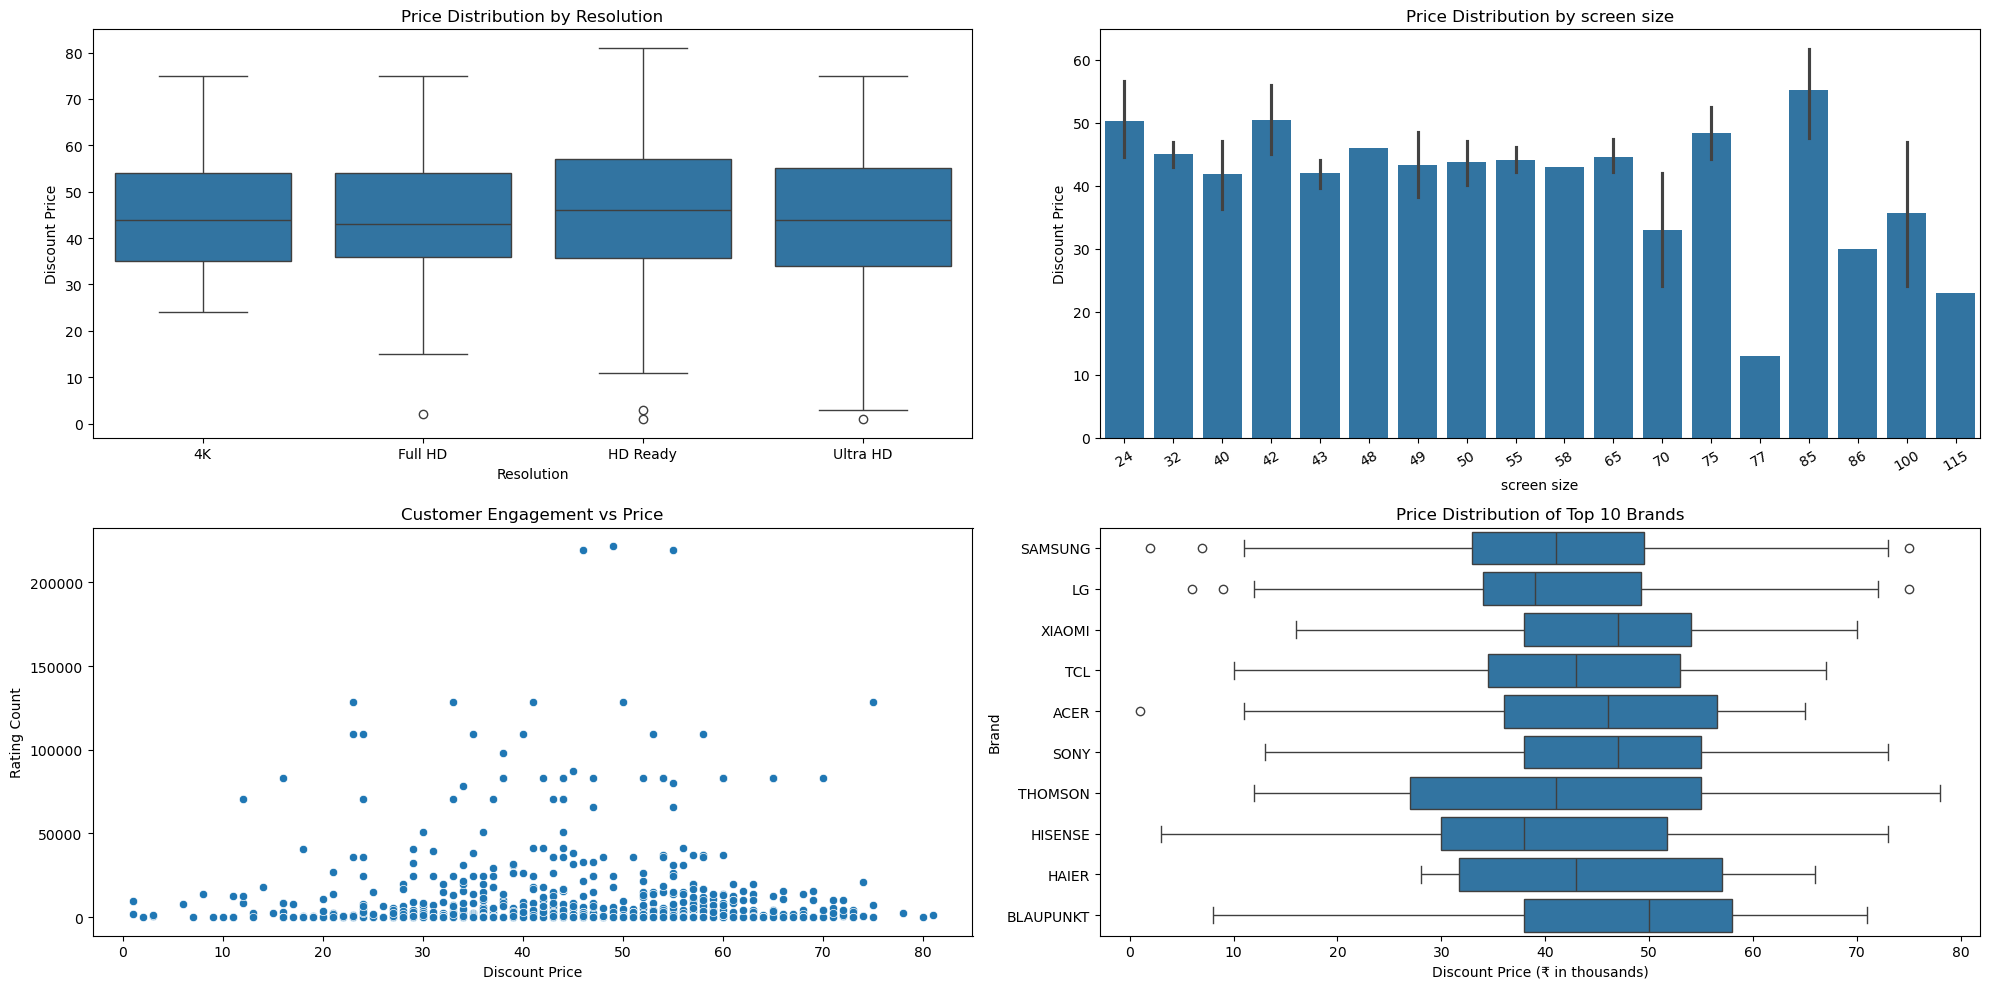

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify top 10 brands
top_10_brands = df['brand'].value_counts().head(10).index
df_top10 = df[df['brand'].isin(top_10_brands)]

plt.figure(figsize=(20, 10))

# Subplot 1: Price vs Resolution
plt.subplot(2, 2, 1)
sns.boxplot(x='resolution', y='discount', data=df)
plt.title('Price Distribution by Resolution')
plt.xlabel('Resolution')
plt.ylabel('Discount Price')

# Subplot 2: Price vs Operating System
plt.subplot(2, 2, 2)
sns.barplot(x='inches', y='discount', data=df)
plt.title('Price Distribution by screen size')
plt.xlabel('screen size')
plt.ylabel('Discount Price')
plt.xticks(rotation=30)

# Subplot 3: Customer Engagement vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='discount',
    y='Rating_count',
    data=df
)
plt.title('Customer Engagement vs Price')
plt.xlabel('Discount Price')
plt.ylabel('Rating Count')

# ✅ Subplot 4: Price Distribution of Top 10 Brands (FIXED)
ax = plt.subplot(2, 2, 4)

sns.boxplot(
    y='brand',
    x='discount',
    data=df_top10,
    ax=ax
)

ax.set_title('Price Distribution of Top 10 Brands')
ax.set_xlabel('Discount Price (₹ in thousands)')
ax.set_ylabel('Brand')

plt.tight_layout()
plt.show()

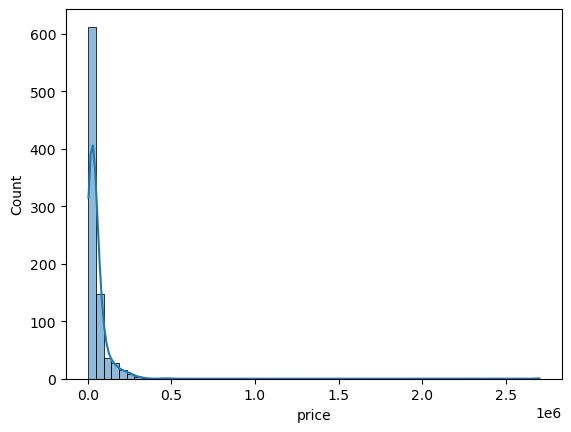

In [23]:
sns.histplot(df['price'], kde=True)
plt.show()

In [27]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

### Detecting outliers with IQR method

In [28]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of outliers:", outliers.shape[0])

Lower Bound: -43842.375
Upper Bound: 115734.625
Number of outliers: 73


In [29]:
outliers[['price']].sort_values(by='price', ascending=False).head(10)

,price
766,2699990
210,469969
251,332918
839,317482
743,294884
841,288076
331,269990
724,268889
684,263990
561,255699


In [31]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df['price'] >= lower_bound) &
    (df['price'] <= upper_bound)]
print("Original rows:", df.shape[0])
print("After removing outliers:", df_no_outliers.shape[0])

Original rows: 852
After removing outliers: 779


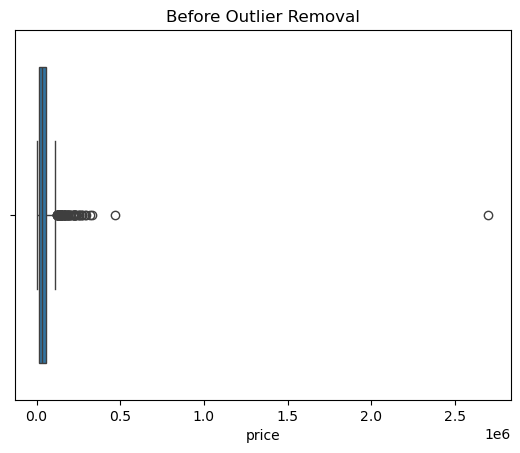

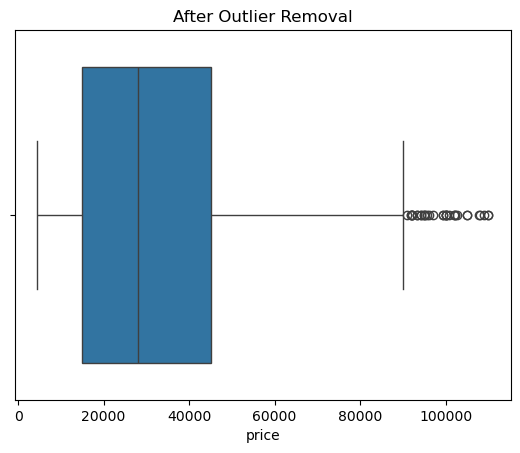

In [32]:
sns.boxplot(x=df['price'])
plt.title("Before Outlier Removal")
plt.show()

sns.boxplot(x=df_no_outliers['price'])
plt.title("After Outlier Removal")
plt.show()

- Outliers in Smart TV prices were removed using the IQR method.
- Extreme values beyond the upper and lower bounds were excluded to reduce skewness.
- This resulted in a more stable price distribution suitable for further analysis.
- For modeling purposes, percentile capping was considered to avoid data loss.

# UNIVARIATE ANALYSIS

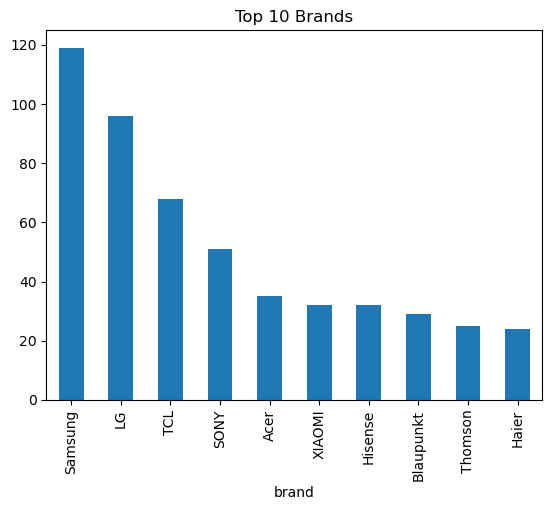

In [34]:
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands')
plt.show()

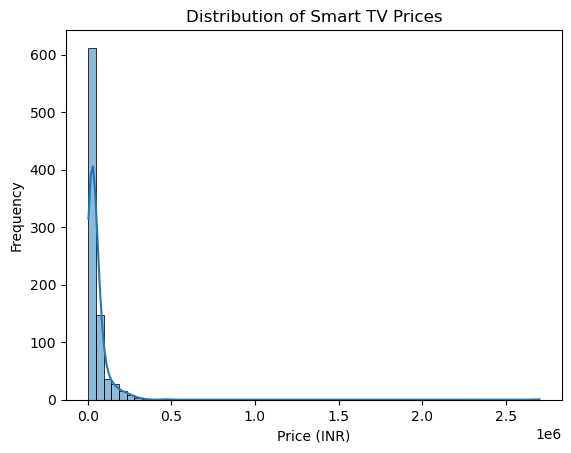

In [36]:
plt.figure()
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Smart TV Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

## Key Insights
Smart TV prices are highly right-skewed, with most products clustered in the low to mid-price range.
Very few high-priced TVs exist, indicating premium models are limited and mainly serve niche or brand positioning purposes.

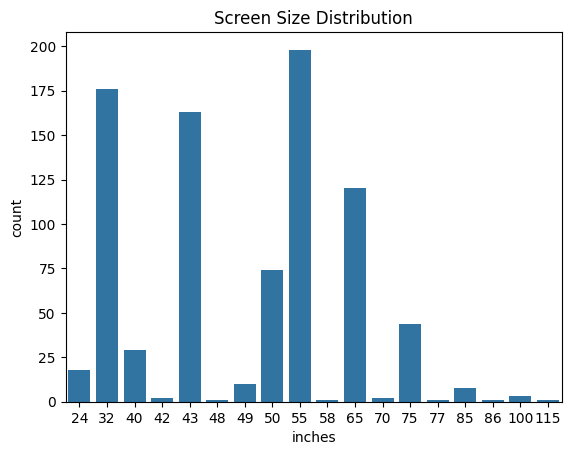

In [20]:
plt.figure()
sns.countplot(x='inches', data=df)
plt.title("Screen Size Distribution")
plt.show()

## Key Insights
Smart TV demand is highest for mid-sized screens (43–55 inches), showing a strong preference for home-usable, value-for-money models.
Very large screen sizes (above 70 inches) have low counts, indicating they cater to a niche, premium customer segment rather than mass adoption.

## RESOLUTION 

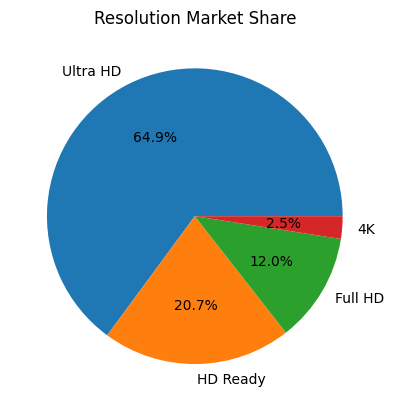

In [27]:
plt.figure()
df['resolution'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Resolution Market Share")
plt.ylabel("")
plt.show()

##  Key Insight: Resolution Market Share
Ultra HD TVs dominate the market, accounting for nearly two-thirds of all available models. HD Ready TVs still maintain a notable presence, while Full HD occupies a smaller share.
The relatively low proportion of 4K-labeled models suggests that Ultra HD has become the standard resolution category, with other resolutions gradually losing relevance in the Smart TV market.

# Operating system Distribution

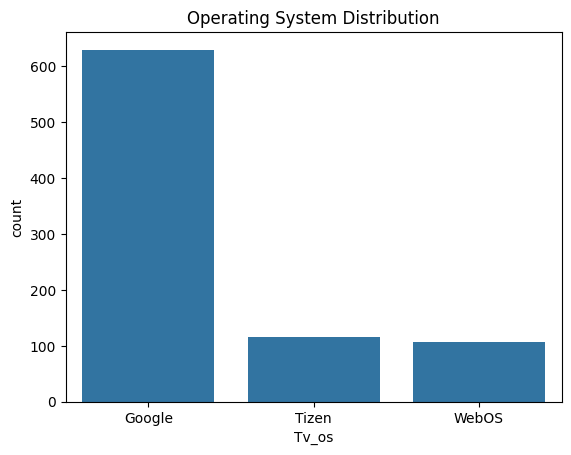

In [22]:
plt.figure()
sns.countplot(x='Tv_os', data=df)
plt.title("Operating System Distribution")
plt.show()

##  Key Insight: Operating System Distribution

Google TV dominates the Smart TV market in terms of model availability, far outnumbering other operating systems such as Tizen and WebOS.

This indicates strong platform adoption by manufacturers and suggests that Google TV has become the default operating system choice, while other OS platforms occupy smaller, brand-specific niches.


## Customer Engagement Distribution

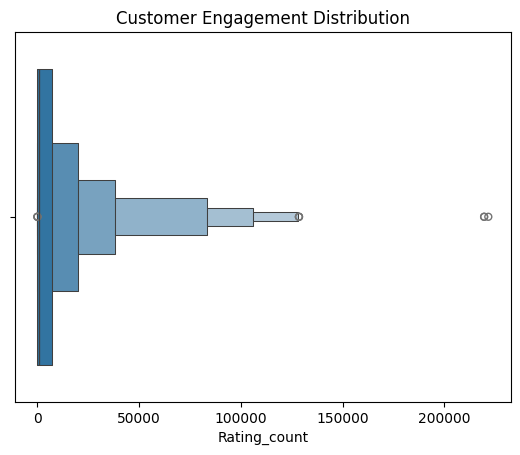

In [33]:
plt.figure()
sns.boxenplot(x=df['Rating_count'])
plt.title("Customer Engagement Distribution")
plt.show()

##  Key Insight: Customer Engagement Distribution

Customer engagement, measured by rating count, is highly right-skewed. Most Smart TV models receive relatively low engagement, while a small number of TVs accumulate exceptionally high ratings.

This indicates that customer attention is concentrated on a limited set of popular models, suggesting strong winner-takes-most dynamics in the Smart TV market.


# 2. Bivariate Analysis

#  Price vs Screen Size

C:\Users\jyada\AppData\Local\Temp\ipykernel_22000\2000067601.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby('inches')['price'].mean().reset_index()


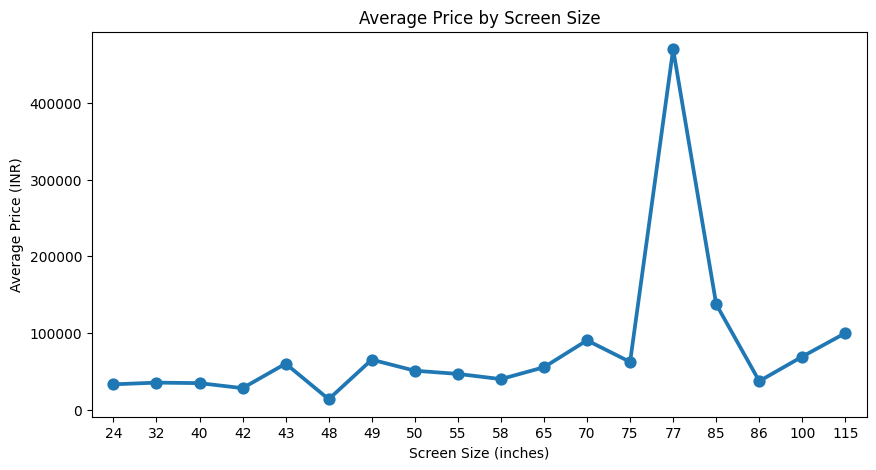

In [75]:
avg_price = df.groupby('inches')['price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.pointplot(
    x='inches',
    y='price',
    data=avg_price,
    marker='o'
)

plt.title("Average Price by Screen Size")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Average Price (INR)")
plt.show()


## Key Insights:

Average TV price generally increases with screen size, showing a positive size–price relationship.
Mid-size TVs (40–55 inches) are relatively stable and affordable compared to very large screens.
Large screens (75–85 inches) show sharp price jumps, indicating premium pricing.
A few extreme spikes (outliers) suggest high-end or luxury TV models at certain sizes.
Price variation increases as screen size grows, meaning larger TVs have wider price ranges.

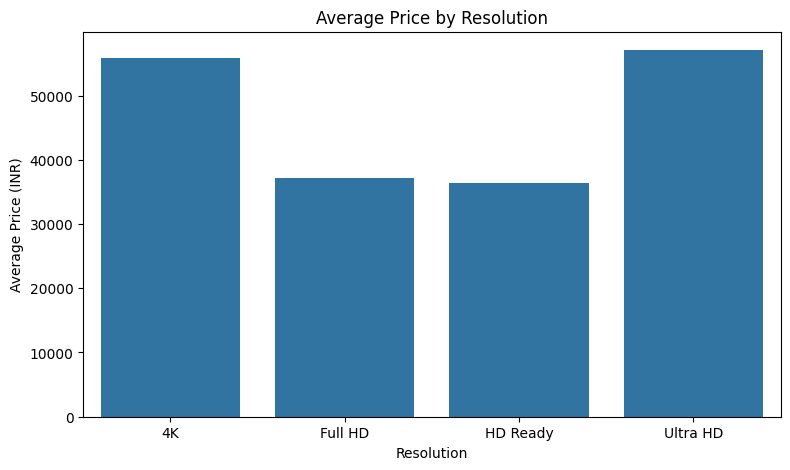

In [76]:
plt.figure(figsize=(9,5))
sns.barplot(
    x='resolution',
    y='price',
    data=df,
    estimator='mean',
    errorbar=None
)

plt.title("Average Price by Resolution")
plt.xlabel("Resolution")
plt.ylabel("Average Price (INR)")
plt.show()


## key Insights
TV prices clearly increase as resolution improves, with Ultra HD being the most expensive category.

HD Ready and Full HD TVs are priced lower, making them more budget-friendly options.

4K TVs show a noticeable jump in average price compared to lower resolutions, reflecting added features and better display quality.

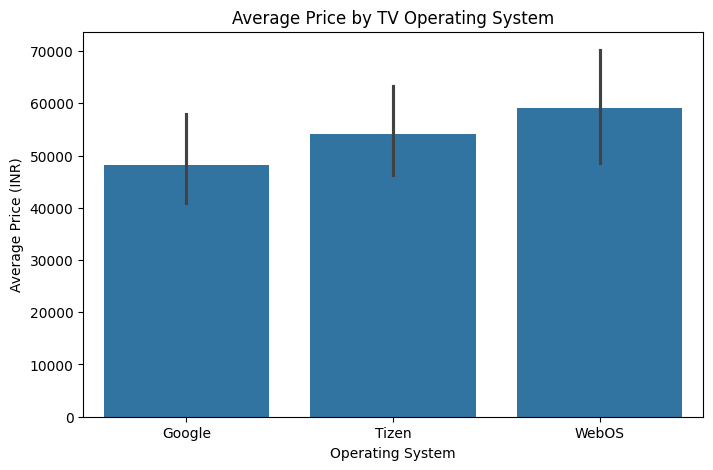

In [51]:
plt.figure(figsize=(8,5))

sns.barplot(
    x='Tv_os',
    y='price',
    data=df,
    estimator='mean'
)

plt.title("Average Price by TV Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Price (INR)")
plt.show()


## Key insights
WebOS TVs are priced the highest on average, indicating a more premium market positioning.

Tizen-based TVs fall in the mid-price range, balancing cost and features.

Google TV models are generally the most affordable, targeting budget-conscious buyers.

Price variability exists across all operating systems, with WebOS showing the widest range.

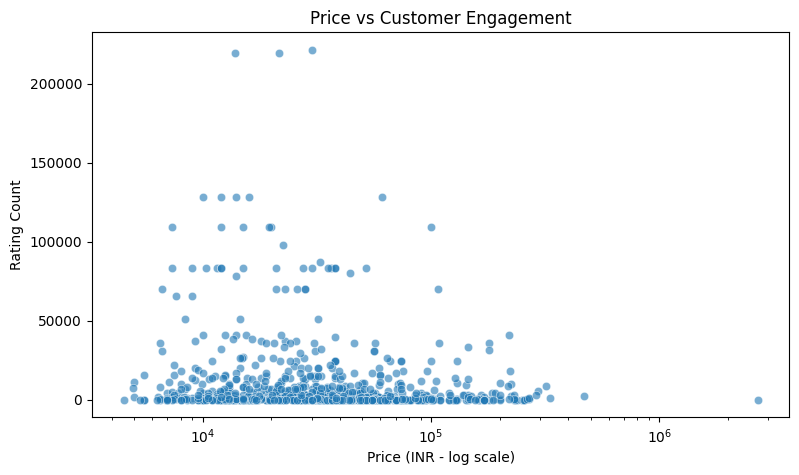

In [49]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    x='price',
    y='Rating_count',
    data=df,
    alpha=0.6
)

plt.xscale('log')
plt.title("Price vs Customer Engagement")
plt.xlabel("Price (INR - log scale)")
plt.ylabel("Rating Count")
plt.show()


## key insights 
Customer engagement is highest in the low to mid-price range, especially between ₹10,000 and ₹50,000.
Higher price does not guarantee more engagement, as expensive TVs generally receive fewer ratings.
Several mid-priced TVs stand out as engagement outliers, suggesting strong popularity or value perception.
Overall, affordability drives customer interaction more than premium pricing.

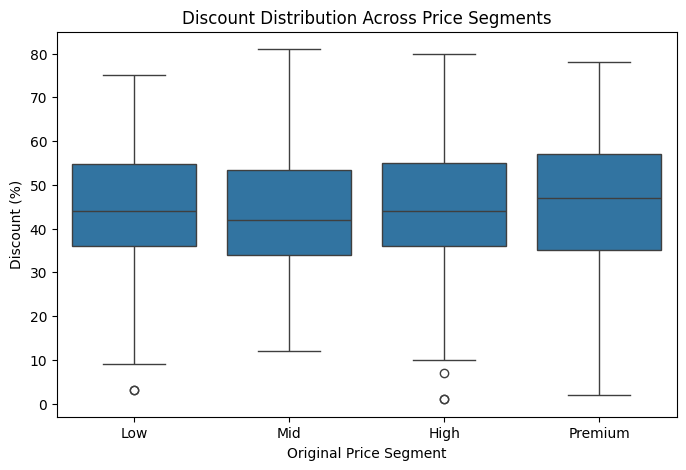

In [52]:
# Create price buckets
df['price_category'] = pd.qcut(
    df['original_price'],
    q=4,
    labels=['Low', 'Mid', 'High', 'Premium']
)

plt.figure(figsize=(8,5))

sns.boxplot(
    x='price_category',
    y='discount',
    data=df
)

plt.title("Discount Distribution Across Price Segments")
plt.xlabel("Original Price Segment")
plt.ylabel("Discount (%)")
plt.show()


###  Key Insight: Discount vs Original Price Segment

+ The median discount percentage increases slightly as we move from low-priced to premium-priced TVs.  
Premium segment TVs show a wider discount range, indicating more aggressive and flexible discounting strategies.

+ This suggests that higher original prices are often paired with larger advertised discounts, likely used as a psychological pricing tactic rather than reflecting proportional cost savings.


## Multivariate Analysis

Price vs Resolution vs Panel (Box Plot)
Shows how price varies across resolutions for different panel types

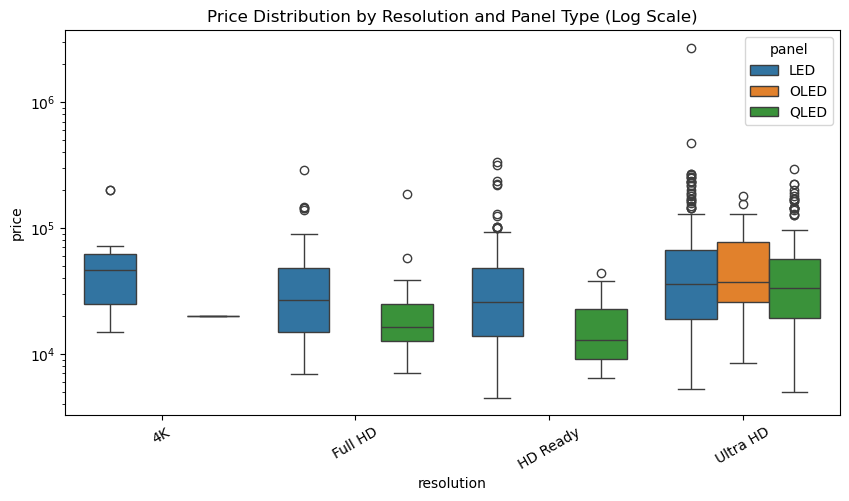

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='resolution', y='price', hue='panel', data=df)
plt.yscale('log')
plt.title("Price Distribution by Resolution and Panel Type (Log Scale)")
plt.xticks(rotation=30)
plt.show()

## Key insights
* OLED and QLED TVs are priced higher than LED, especially in **4K and Ultra HD**, reflecting premium panel technology.
* Ultra HD shows the widest price spread, indicating strong variation by panel type and brand.
* HD Ready and Full HD models cluster at lower prices, mainly dominated by **LED panels**, targeting budget segments.


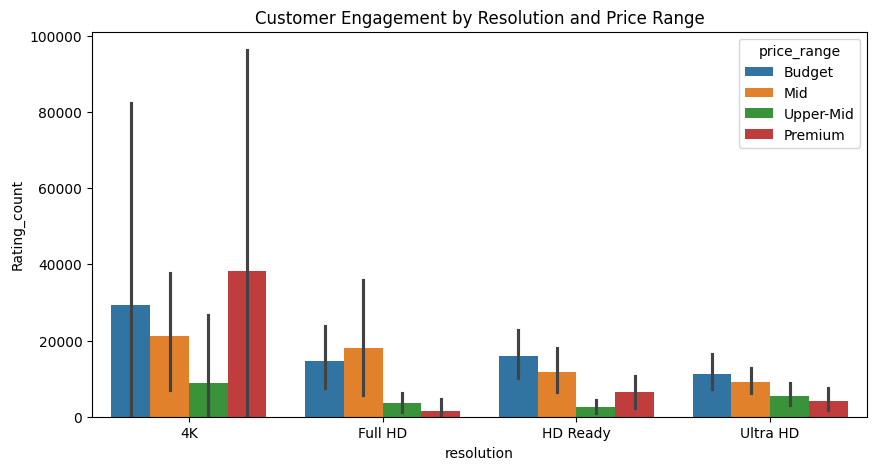

In [85]:
df['price_range'] = pd.cut(
    df['price'],
    bins=[0,20000,40000,60000,100000],
    labels=['Budget','Mid','Upper-Mid','Premium']
)

plt.figure(figsize=(10,5))
sns.barplot(x='resolution', y='Rating_count', hue='price_range', data=df)
plt.title("Customer Engagement by Resolution and Price Range")
plt.show()


## key insights

* 4K TVs receive the highest customer engagement, especially in the Budget and Premium price ranges, showing strong demand at both ends.
* Full HD engagement is strongest in the Mid price range, indicating value-seeking customers prefer this segment.
* Ultra HD and HD Ready show lower overall engagement, suggesting limited demand compared to 4K models.


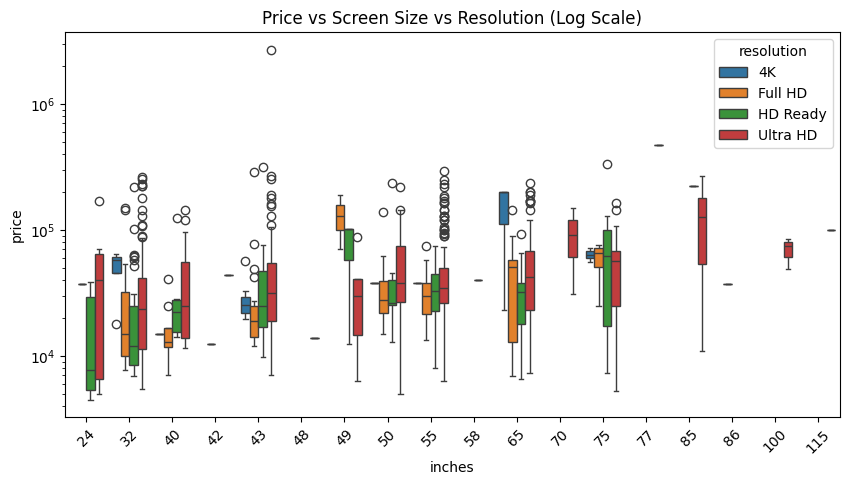

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x='inches', y='price', hue='resolution', data=df)
plt.yscale('log')
plt.title("Price vs Screen Size vs Resolution (Log Scale)")
plt.xticks(rotation=45)
plt.show()

## key insights

* TV prices increase with screen size, and the rise is much steeper for **4K and Ultra HD** models (even on the log scale).
* Higher resolutions consistently cost more than HD Ready and Full HD at the same screen size.
* Price dispersion grows for larger screens, showing wide variation due to brand and feature differences.


C:\Users\jyada\AppData\Local\Temp\ipykernel_21796\1750128606.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(


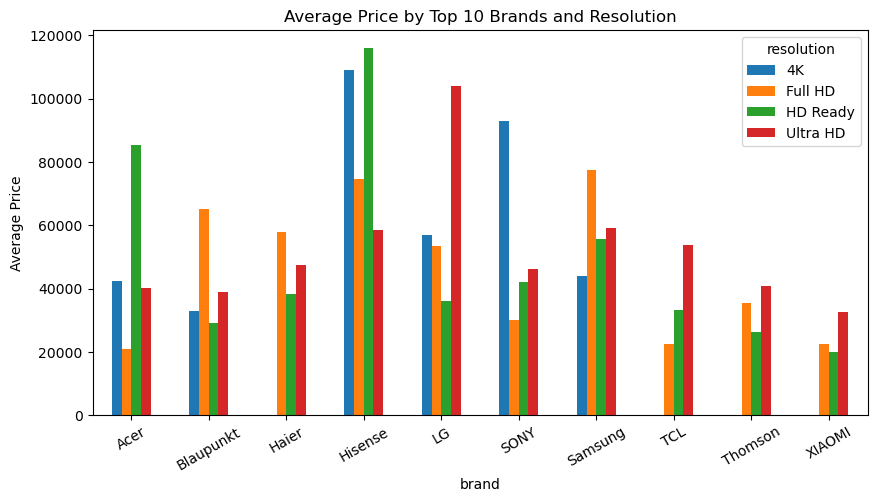

In [38]:
top_brands = df['brand'].value_counts().head(10).index

filtered_df = df[df['brand'].isin(top_brands)]

pivot = filtered_df.pivot_table(
    values='price',
    index='brand',
    columns='resolution',
    aggfunc='mean'
)

pivot.plot(kind='bar', figsize=(10,5))
plt.title("Average Price by Top 10 Brands and Resolution")
plt.ylabel("Average Price")
plt.xticks(rotation=30)
plt.show()


## key insights
4K TVs are priced highest, especially from Sony, LG, and Hisense, reflecting premium positioning.
Samsung shows balanced pricing, while Xiaomi, TCL, and Thomson target budget segments.
Clear price differences across brands indicate brand has a strong impact on TV pricing.

### Hypothesis 1 (ANOVA)
**Question**

Do TVs with different operating systems have different average prices?

**Null Hypothesis (H0):** TVs across all operating systems have equal mean prices.

**Alternate Hypothesis (H1):** At least one operating system has a different mean TV price.

In [56]:
import scipy.stats

Failed to reject Null Hypothesis. i.e There is no relationship between TV OS and Price


C:\Users\jyada\AppData\Local\Temp\ipykernel_22000\3553003236.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tv_os')['price']


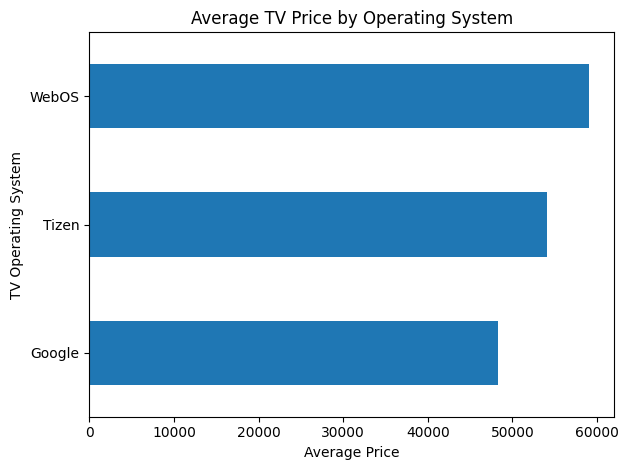

In [64]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
groups = []
labels = []

for os in df['Tv_os'].dropna().unique():
    prices = df[df['Tv_os'] == os]['price'].dropna().values
    if len(prices) > 1:
        groups.append(prices)
        labels.append(os)

stat, p_value = f_oneway(*groups)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between TV OS and Price")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between TV OS and Price")


mean_price_os = (
    df.groupby('Tv_os')['price']
    .mean()
    .sort_values()
)

plt.figure()
mean_price_os.plot(kind='barh')
plt.xlabel("Average Price")
plt.ylabel("TV Operating System")
plt.title("Average TV Price by Operating System")
plt.tight_layout()
plt.show()


### Hypothesis 2 (Independent T-Test)
**Question**

Is there a significant difference in average prices between HD Ready TVs and 4K TVs?

**Null Hypothesis (H0)**

The mean price of HD Ready TVs is equal to the mean price of 4K TVs.

**Alternate Hypothesis (H1)**

The mean price of HD Ready TVs is significantly different from the mean price of 4K TVs.

Failed to reject Null Hypothesis. i.e There is no relationship between Resolution and Price


C:\Users\jyada\AppData\Local\Temp\ipykernel_22000\617485856.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hd_prices, fourk_prices], labels=['HD Ready', '4K'])


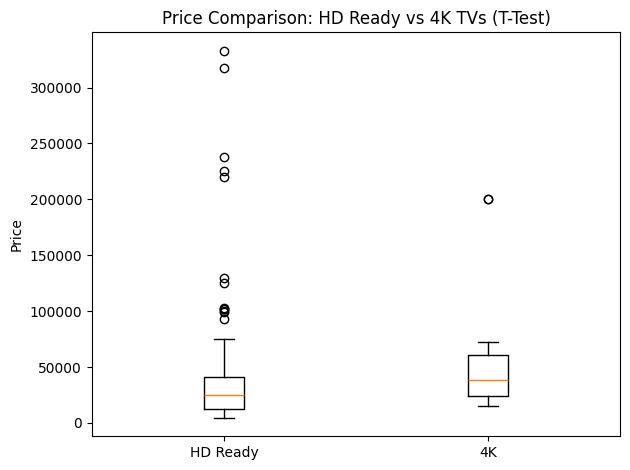

In [67]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


hd_prices = df[df['resolution'] == 'HD Ready']['price'].dropna()
fourk_prices = df[df['resolution'] == '4K']['price'].dropna()


t_stat, p_value = ttest_ind(hd_prices, fourk_prices, equal_var=False)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between Resolution and Price")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between Resolution and Price")

plt.figure()
plt.boxplot([hd_prices, fourk_prices], labels=['HD Ready', '4K'])
plt.ylabel("Price")
plt.title("Price Comparison: HD Ready vs 4K TVs (T-Test)")
plt.tight_layout()
plt.show()


### 3 Key Insights: HD Ready vs 4K TV Prices

The median price of 4K TVs is higher than that of HD Ready TVs, indicating a general upward price trend with better resolution.**

However, HD Ready TVs show a much wider price spread, with several high-priced outliers.**

The presence of extreme outliers in HD Ready TVs suggests that factors other than resolution (such as brand, screen size, or smart features) strongly influence price.**

The price distributions overlap significantly between HD Ready and 4K TVs.**

As supported by the T-test result, we fail to reject the null hypothesis, meaning the observed price difference is not statistically significant.**

## H3 : TV Screen size vs Price
**Question**

Do TVs with different screen size  have different average prices?

Null Hypothesis (H0)**

Mean TV prices are the same across all screen size .

Alternate Hypothesis (H1)**

At least one screen size  has a different mean TV price.

Reject Null Hypothesis. i.e There is relationship between Screen Size and Price


C:\Users\jyada\AppData\Local\Temp\ipykernel_22000\1209494839.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = df.groupby('size_category')['price'].mean()


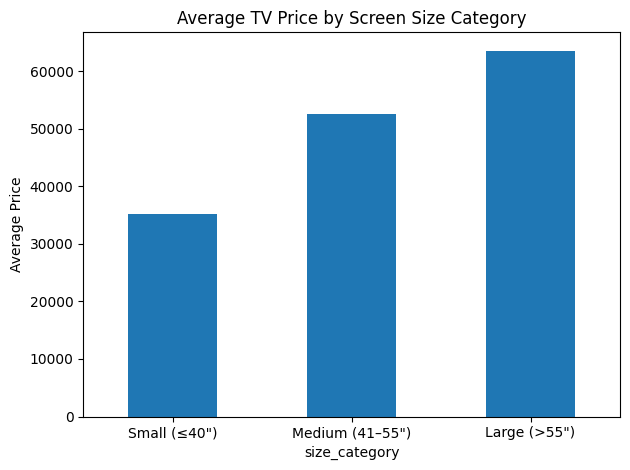

In [69]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import pandas as pd
df['size_category'] = pd.cut(
    df['inches'],
    bins=[0, 40, 55, 100],
    labels=['Small (≤40")', 'Medium (41–55")', 'Large (>55")']
)


groups = []
labels = []

for s in df['size_category'].dropna().unique():
    prices = df[df['size_category'] == s]['price'].dropna().values
    if len(prices) > 1:
        groups.append(prices)
        labels.append(s)

stat, p_value = f_oneway(*groups)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between Screen Size and Price")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between Screen Size and Price")



mean_prices = df.groupby('size_category')['price'].mean()

plt.figure()
mean_prices.plot(kind='bar')
plt.ylabel("Average Price")
plt.title("Average TV Price by Screen Size Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Key Insights

Average TV prices increase consistently with screen size, indicating a strong positive relationship between size and price.

Small TVs (≤40") are the most affordable category, making them suitable for budget-conscious buyers.

Medium-sized TVs (41–55") show a significant jump in average price, suggesting added value from better resolution and features.

Large TVs (>55") command the highest average prices, reflecting premium positioning and advanced display technologies.

The clear separation between bars suggests that screen size is a major driver of TV pricing, not just a minor contributing factor.